In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [34]:
df = pd.read_csv('/home/sanjay/Desktop/dslab_el/Men .csv')

In [35]:
print("Dimension:", df.shape)

Dimension: (5942, 11)


In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5942 entries, 0 to 5941
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Result        5942 non-null   object
 1   Margin        5935 non-null   object
 2   Match         5942 non-null   object
 3   Home/Away     5942 non-null   object
 4   Ground        5942 non-null   object
 5   Match Date    5942 non-null   object
 6   Match Month   5942 non-null   object
 7   Match Year    5942 non-null   int64 
 8   Match Period  5942 non-null   object
 9   Matches       5942 non-null   int64 
 10  Country       5942 non-null   object
dtypes: int64(2), object(9)
memory usage: 510.8+ KB
None


In [61]:
df.head(3)

,Result,Margin,Match,Home/Away,Ground,Match Date,Match Month,Match Year,Match Period,Matches,Country,Margin Runs,Margin Wickets,Margin_std
0,Lost,5.0,Sri Lanka v England,Away,Dambulla,2001-03-23,Mar,2001,Mar 2001,1,England,0,5,-0.652038
1,Lost,66.0,Sri Lanka v England,Away,Colombo (RPS),2001-03-25,Mar,2001,Mar 2001,1,England,66,0,0.801166
2,Lost,10.0,Sri Lanka v England,Away,Colombo (SSC),2001-03-27,Mar,2001,Mar 2001,1,England,0,10,-0.532923


In [43]:
print(df.describe())

        Match Year  Matches
count  5942.000000   5942.0
mean   2011.458263      1.0
std       6.615554      0.0
min    2001.000000      1.0
25%    2006.000000      1.0
50%    2011.000000      1.0
75%    2017.000000      1.0
max    2024.000000      1.0


In [44]:
print("Missing values before treatment:")
print(df.isnull().sum())

Missing values before treatment:
Result          0
Margin          7
Match           0
Home/Away       0
Ground          0
Match Date      0
Match Month     0
Match Year      0
Match Period    0
Matches         0
Country         0
dtype: int64


In [45]:
df['Match Date'] = pd.to_datetime(df['Match Date'])
df['Result'] = df['Result'].astype('category')
df['Home/Away'] = df['Home/Away'].astype('category')
df['Ground'] = df['Ground'].astype('category')
df['Match Month'] = df['Match Month'].astype('category')
df['Match Year'] = df['Match Year'].astype('category')
df['Match Period'] = df['Match Period'].astype('category')
df['Country'] = df['Country'].astype('category')

In [46]:

df['Margin Runs'] = df['Margin'].str.extract('(\d+) runs', expand=False).fillna(0).astype(int)
df['Margin Wickets'] = df['Margin'].str.extract('(\d+) wickets', expand=False).fillna(0).astype(int)
df['Margin'] = df['Margin Runs'] + df['Margin Wickets']

df = df.dropna(subset=['Margin'])

print("Missing values after treatment:")
print(df.isnull().sum())

Missing values after treatment:
Result            0
Margin            0
Match             0
Home/Away         0
Ground            0
Match Date        0
Match Month       0
Match Year        0
Match Period      0
Matches           0
Country           0
Margin Runs       0
Margin Wickets    0
dtype: int64


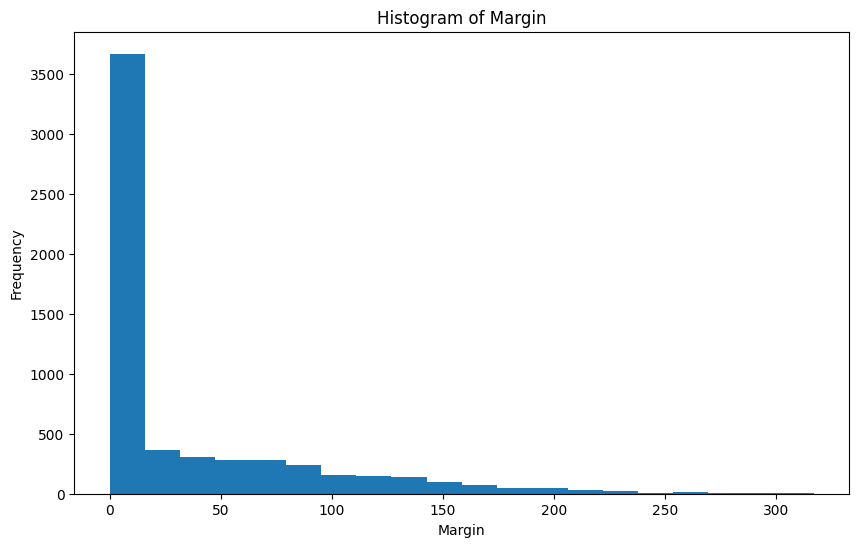

In [47]:
plt.figure(figsize=(10,6))
plt.hist(df['Margin'], bins=20)
plt.title('Histogram of Margin')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.show()

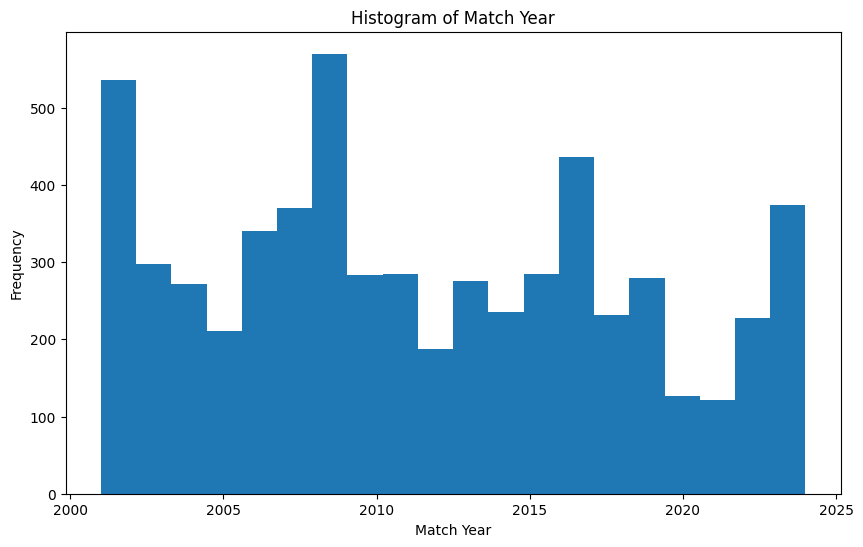

In [48]:
plt.figure(figsize=(10,6))
plt.hist(df['Match Year'], bins=20)
plt.title('Histogram of Match Year')
plt.xlabel('Match Year')
plt.ylabel('Frequency')
plt.show()

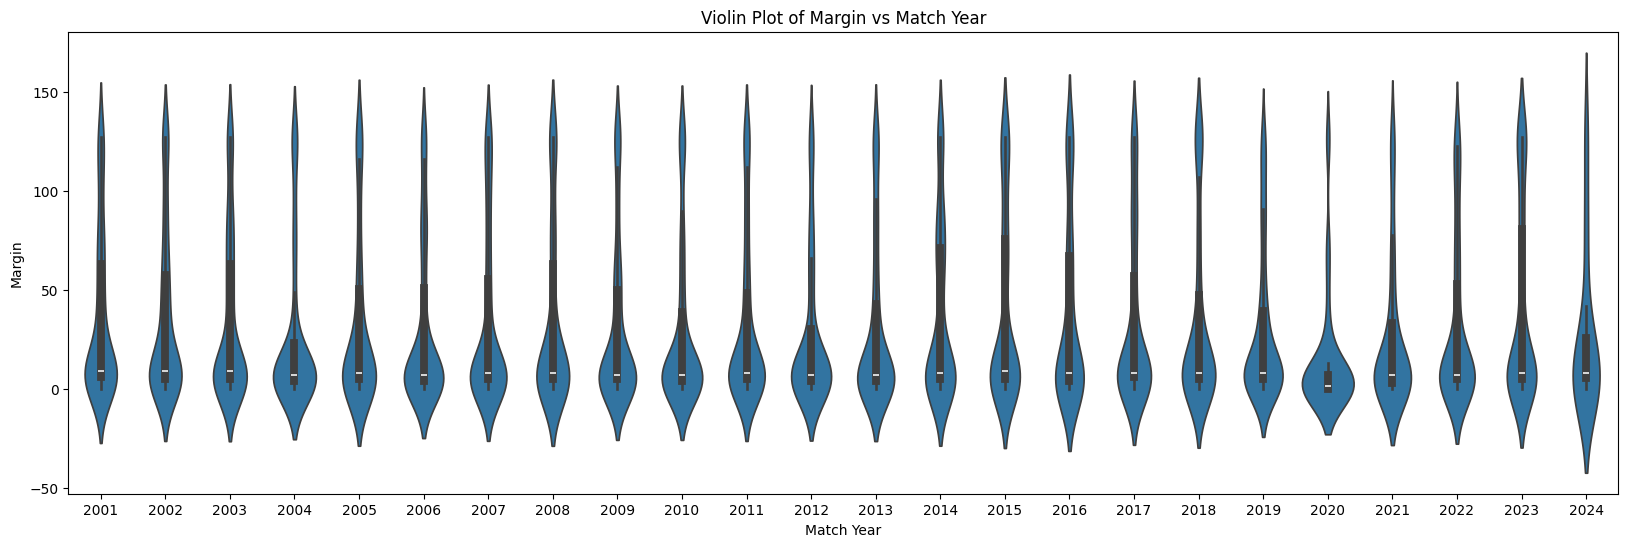

In [62]:
plt.figure(figsize=(20,6))
sns.violinplot(x='Match Year', y='Margin', data=df)
plt.title('Violin Plot of Margin vs Match Year')
plt.xlabel('Match Year')
plt.ylabel('Margin')
plt.show()

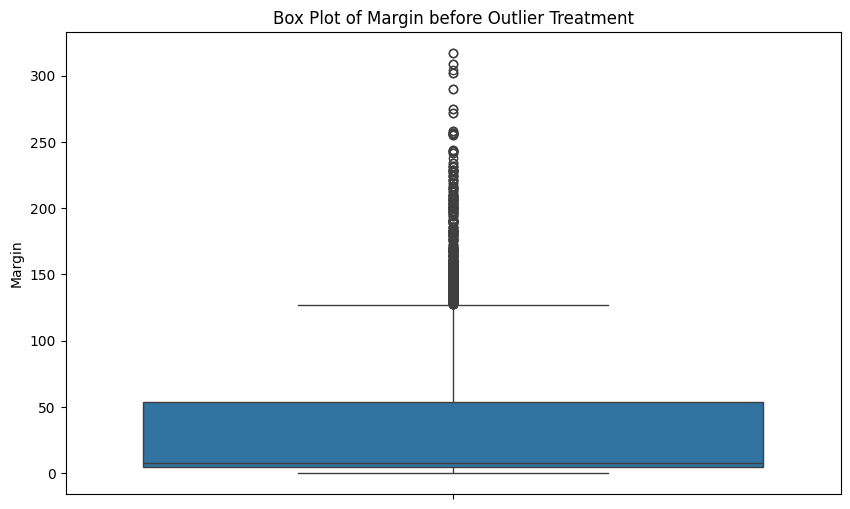

In [50]:
plt.figure(figsize=(10,6))
sns.boxplot(df['Margin'])
plt.title('Box Plot of Margin before Outlier Treatment')
plt.show()

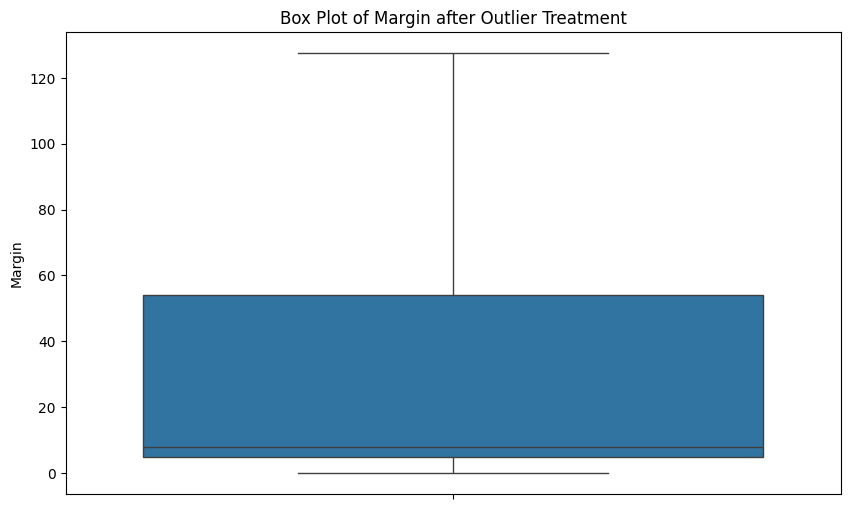

In [51]:
Q1 = df['Margin'].quantile(0.25)
Q3 = df['Margin'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Margin'] = np.where(df['Margin'] < lower_bound, lower_bound, df['Margin'])
df['Margin'] = np.where(df['Margin'] > upper_bound, upper_bound, df['Margin'])

plt.figure(figsize=(10,6))
sns.boxplot(df['Margin'])
plt.title('Box Plot of Margin after Outlier Treatment')
plt.show()

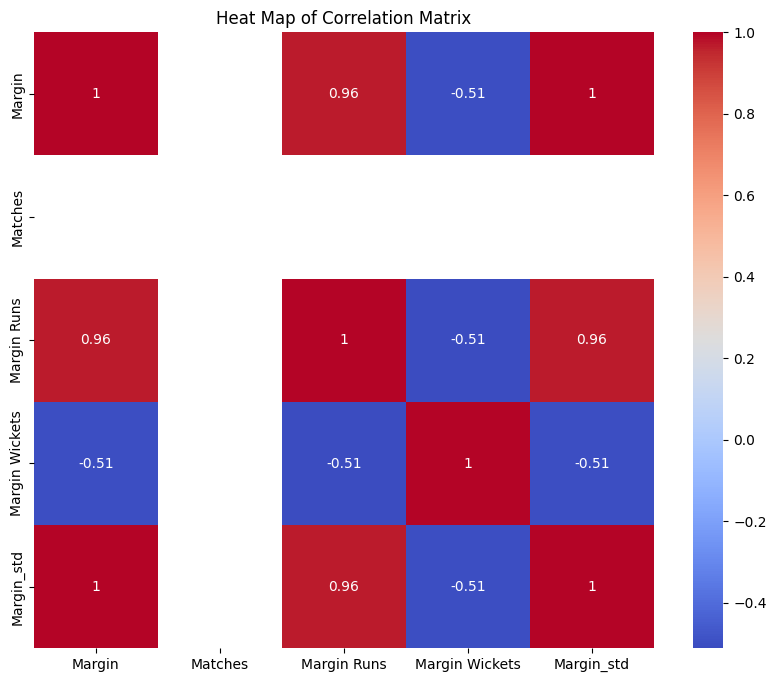

In [67]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heat Map of Correlation Matrix')
plt.show()


In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Margin_std'] = scaler.fit_transform(df[['Margin']])

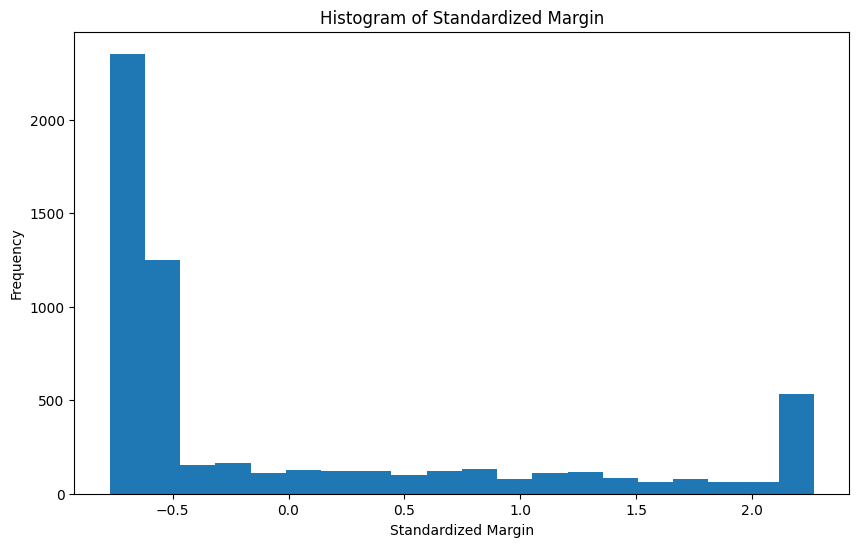

In [54]:
plt.figure(figsize=(10,6))
plt.hist(df['Margin_std'], bins=20)
plt.title('Histogram of Standardized Margin')
plt.xlabel('Standardized Margin')
plt.ylabel('Frequency')
plt.show()

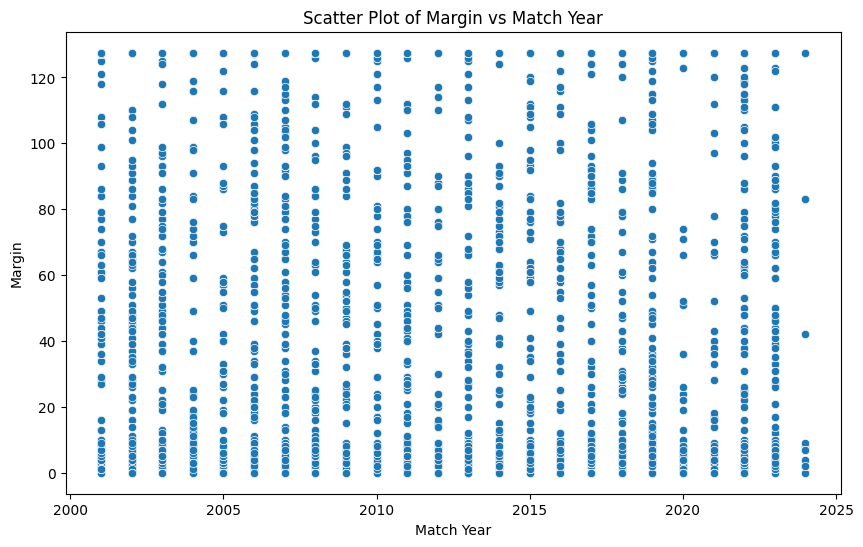

In [55]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Match Year', y='Margin', data=df)
plt.title('Scatter Plot of Margin vs Match Year')
plt.xlabel('Match Year')
plt.ylabel('Margin')
plt.show()

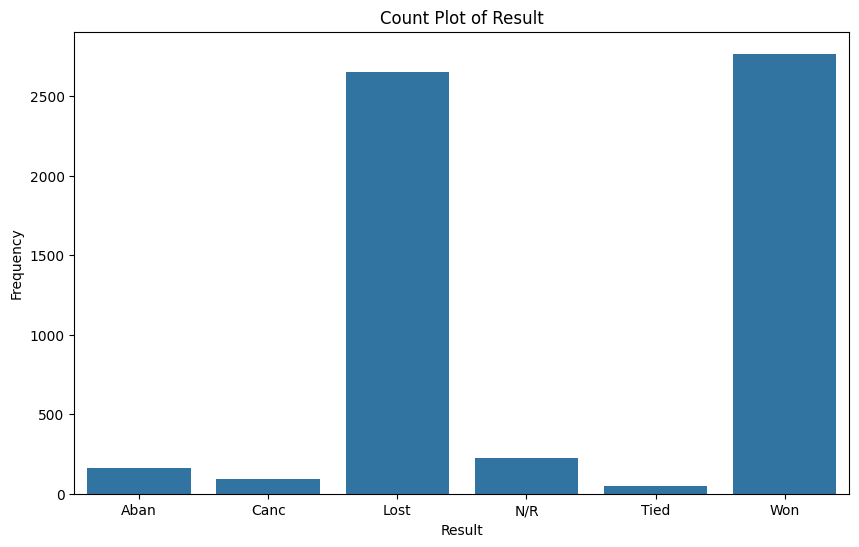

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(x='Result', data=df)
plt.title('Count Plot of Result')
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.show()

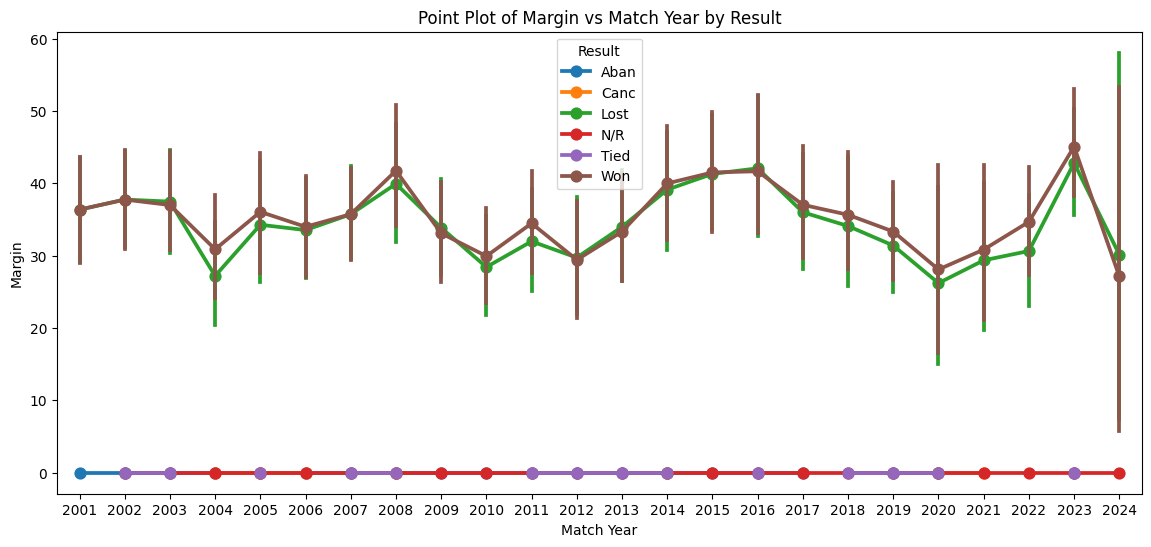

In [69]:
plt.figure(figsize=(14,6))
sns.pointplot(x='Match Year', y='Margin', hue='Result', data=df)
plt.title('Point Plot of Margin vs Match Year by Result')
plt.xlabel('Match Year')
plt.ylabel('Margin')
plt.show()